# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

# Equilibrazione


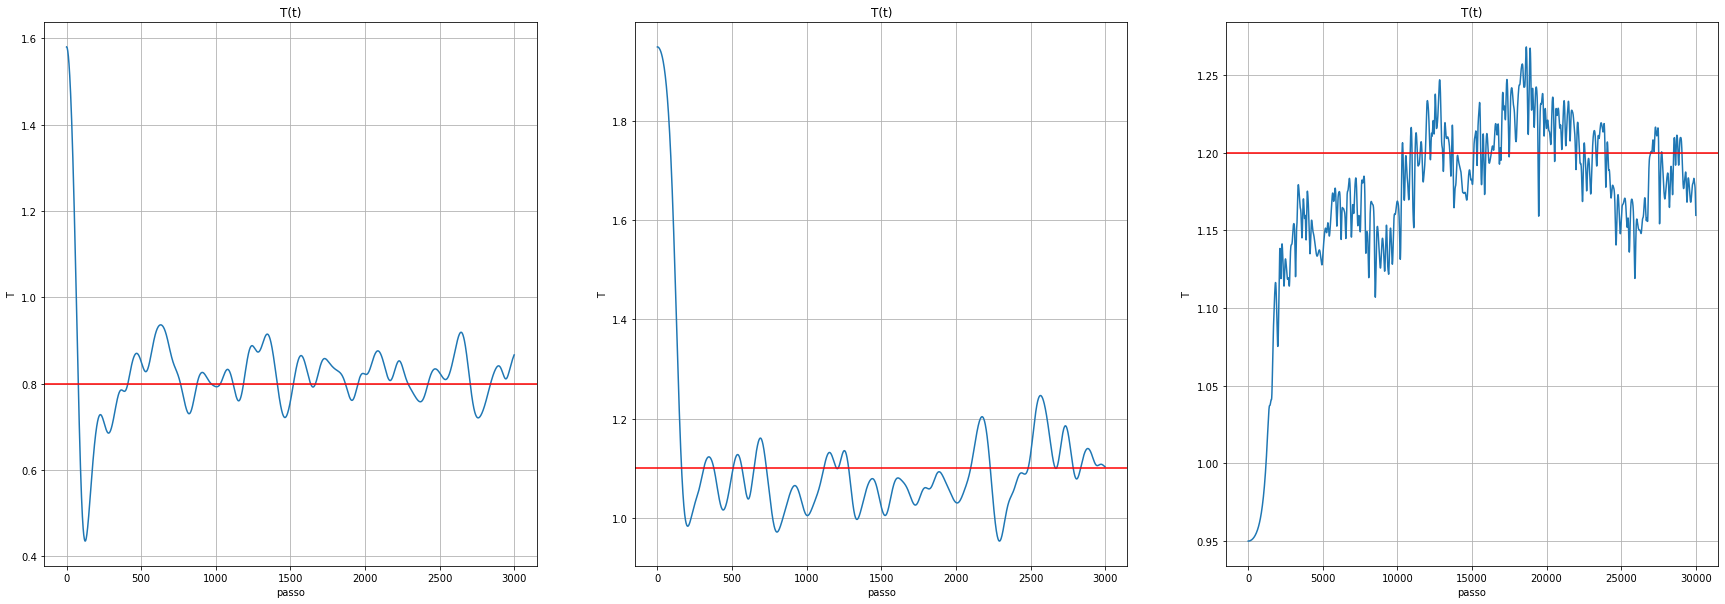

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(30,10))


temp_s = np.loadtxt("solid/eq.temp.s.0.out", usecols=(1), unpack='true')
x_s = np.arange(0,temp_s.size)
temp_l = np.loadtxt("liquid/eq.temp.l.0.out", usecols=(1), unpack='true')
x_l = np.arange(0,temp_l.size)
temp_g = np.loadtxt("gas/eq.temp.g.0.out", usecols=(1), unpack='true')
x_g = np.arange(0,temp_g.size)


ax2.plot(x_g, temp_g)
ax2.set_title("T(t)")
ax2.set_ylabel("T")
ax2.set_xlabel("passo")
ax2.axhline(1.2, color="red")

ax0.plot(x_s, temp_s)
ax0.set_title("T(t)")
ax0.set_ylabel("T")
ax0.set_xlabel("passo")
ax0.axhline(0.8, color="red")


ax1.plot(x_l, temp_l)
ax1.set_title("T(t)")
ax1.set_ylabel("T")
ax1.set_xlabel("passo")
ax1.axhline(1.1, color="red")

ax0.grid()
ax2.grid()
ax1.grid()

L'equilibrazione è stata eseguita scegliendo una temperatura di partenza diversa da quella assegnata in modo tale che con l'evoluzione del sistema si arrivasse alla temperatura stabilita. In particolare per il solido la temperatura è stata impostata a 1.58, per il liquido a 1.98 e per il gas 0.95. Per il gas sono serviti molti più passi perchè la temperatura varia molto più bruscamente.


# Solid Phase

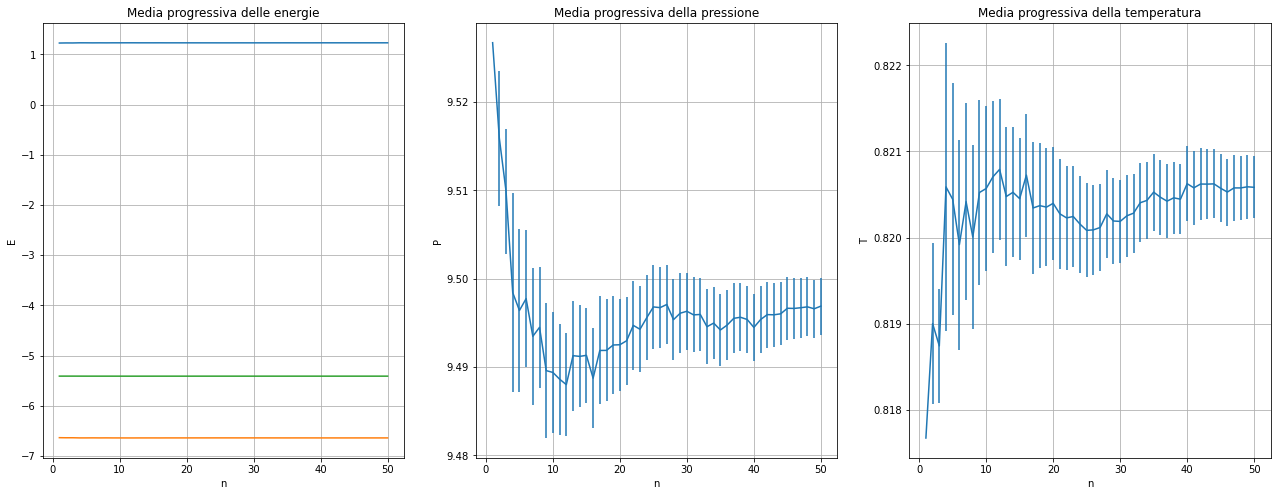

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, Ekin_s, err_s1 = np.loadtxt("solid/ekin.s.0.out", usecols=(0,2,3), unpack='true')
Epot_s, err_s2 = np.loadtxt("solid/epot.s.0.out", usecols=(2,3), unpack='true')
Pres_s, err_s3 = np.loadtxt("solid/pres.s.0.out", usecols=(2,3), unpack='true')
Etot_s, err_s4 = np.loadtxt("solid/etot.s.0.out", usecols=(2,3), unpack='true')
temp_s, err_s5 = np.loadtxt("solid/temp.s.0.out", usecols=(2,3), unpack='true')



fig, [ax_s0, ax_s1, ax_s2] = plt.subplots(1, 3, figsize=(22,8))

ax_s0.errorbar(x,Ekin_s,yerr=err_s1)
ax_s0.errorbar(x,Epot_s,yerr=err_s2)
ax_s0.errorbar(x,Etot_s,yerr=err_s4)
ax_s2.errorbar(x,temp_s,yerr=err_s5)
ax_s1.errorbar(x,Pres_s,yerr=err_s3)


ax_s0.set_title('Media progressiva delle energie')
ax_s1.set_title('Media progressiva della pressione')
ax_s2.set_title('Media progressiva della temperatura')
ax_s0.set_ylabel('E')
ax_s1.set_ylabel('P')
ax_s2.set_ylabel('T')

ax_s0.grid()
ax_s2.grid()
ax_s1.grid()

for i in range(3):
        globals()['ax_s'+str(i)].set_xlabel('n')

# Liquid Phase

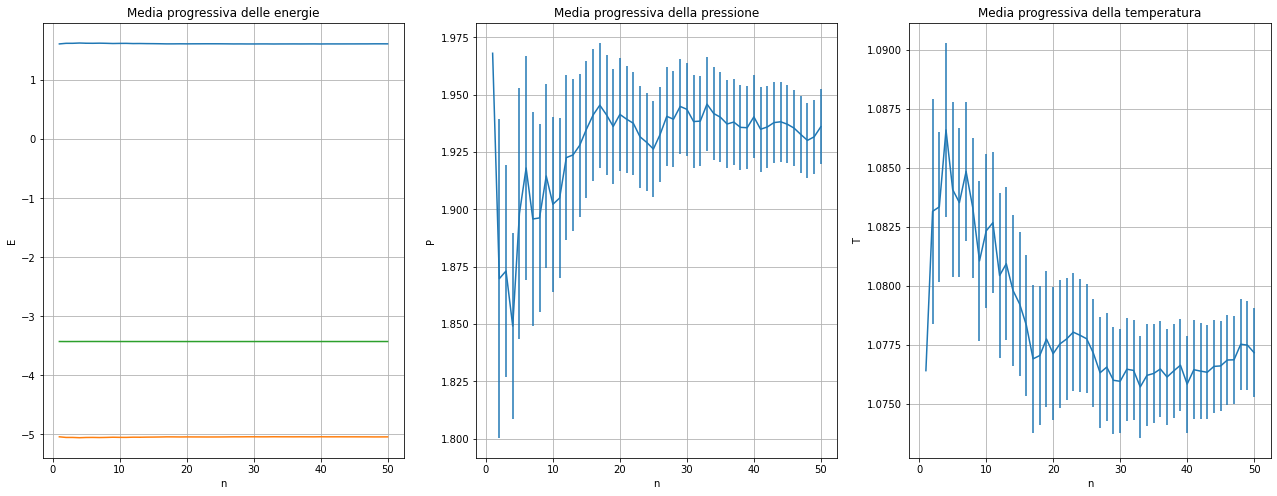

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, Ekin_l, err_l1 = np.loadtxt("liquid/ekin.l.0.out", usecols=(0,2,3), unpack='true')
Epot_l, err_l2 = np.loadtxt("liquid/epot.l.0.out", usecols=(2,3), unpack='true')
Pres_l, err_l3 = np.loadtxt("liquid/pres.l.0.out", usecols=(2,3), unpack='true')
Etot_l, err_l4 = np.loadtxt("liquid/etot.l.0.out", usecols=(2,3), unpack='true')
temp_l, err_l5 = np.loadtxt("liquid/temp.l.0.out", usecols=(2,3), unpack='true')



fig, [ax_l0, ax_l1, ax_l2] = plt.subplots(1, 3, figsize=(22,8))

ax_l0.errorbar(x,Ekin_l,yerr=err_l1)
ax_l0.errorbar(x,Epot_l,yerr=err_l2)
ax_l0.errorbar(x,Etot_l,yerr=err_l4)
ax_l2.errorbar(x,temp_l,yerr=err_l5)
ax_l1.errorbar(x,Pres_l,yerr=err_l3)


ax_l0.set_title('Media progressiva delle energie')
ax_l1.set_title('Media progressiva della pressione')
ax_l2.set_title('Media progressiva della temperatura')
ax_l0.set_ylabel('E')
ax_l1.set_ylabel('P')
ax_l2.set_ylabel('T')


ax_l0.grid()
ax_l2.grid()
ax_l1.grid()


for i in range(3):
        globals()['ax_l'+str(i)].set_xlabel('n')

# Gas Phase

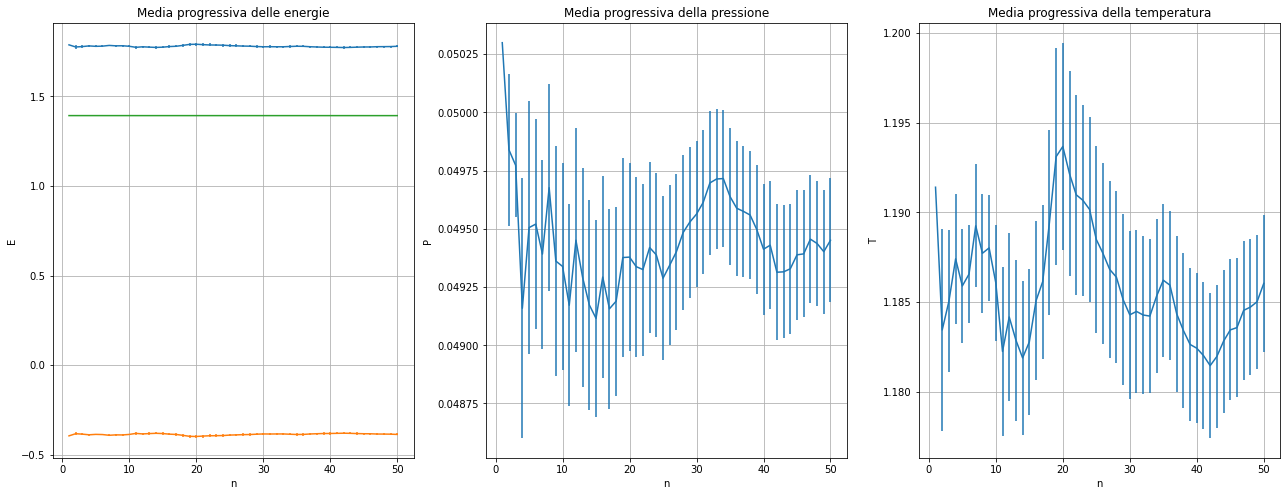

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, Ekin_g, err_g1 = np.loadtxt("gas/ekin.g.0.out", usecols=(0,2,3), unpack='true')
Epot_g, err_g2 = np.loadtxt("gas/epot.g.0.out", usecols=(2,3), unpack='true')
Pres_g, err_g3 = np.loadtxt("gas/pres.g.0.out", usecols=(2,3), unpack='true')
Etot_g, err_g4 = np.loadtxt("gas/etot.g.0.out", usecols=(2,3), unpack='true')
temp_g, err_g5 = np.loadtxt("gas/temp.g.0.out", usecols=(2,3), unpack='true')



fig, [ax_g0, ax_g1, ax_g2] = plt.subplots(1, 3, figsize=(22,8))

ax_g0.errorbar(x,Ekin_g,yerr=err_g1)
ax_g0.errorbar(x,Epot_g,yerr=err_g2)
ax_g0.errorbar(x,Etot_g,yerr=err_g4)
ax_g2.errorbar(x,temp_g,yerr=err_g5)
ax_g1.errorbar(x,Pres_g,yerr=err_g3)


ax_g0.set_title('Media progressiva delle energie')
ax_g1.set_title('Media progressiva della pressione')
ax_g2.set_title('Media progressiva della temperatura')
ax_g0.set_ylabel('E')
ax_g1.set_ylabel('P')
ax_g2.set_ylabel('T')

ax_g0.grid()
ax_g2.grid()
ax_g1.grid()


for i in range(3):
        globals()['ax_g'+str(i)].set_xlabel('n')

Le simulazioni sono state fatte facendo 50 blocchi da 2000 passi. Dai grafici emerge bene il fatto che il Verlet conservi l'energia, ma a costo di molte fluttuazioni su pressione e temperatura